In [6]:
import pandas as pd
df = pd.read_csv('./dataset/AB_NYC_2019.csv',index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df2.name

id
2539                       Clean & quiet apt home by the park
2595                                    Skylit Midtown Castle
3647                      THE VILLAGE OF HARLEM....NEW YORK !
3831                          Cozy Entire Floor of Brownstone
5022         Entire Apt: Spacious Studio/Loft by central park
                                  ...                        
36484665      Charming one bedroom - newly renovated rowhouse
36485057        Affordable room in Bushwick/East Williamsburg
36485431              Sunny Studio at Historical Neighborhood
36485609                 43rd St. Time Square-cozy single bed
36487245    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [16]:
df3 = df.groupby('room_type').mean()
df3.reset_index()

,room_type,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
1,Private room,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
2,Shared room,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


In [13]:
len(df['name'].unique())

47906

# Sorting

In [19]:
df3.sort_index(ascending=False)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,
Shared room,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862
Private room,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Entire home/apt,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304


In [23]:
df.sort_values(['neighbourhood_group','host_name'])
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
df.neighbourhood_group

id
2539         Brooklyn
2595        Manhattan
3647        Manhattan
3831         Brooklyn
5022        Manhattan
              ...    
36484665     Brooklyn
36485057     Brooklyn
36485431    Manhattan
36485609    Manhattan
36487245    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

# Rank
like sorting but with collision detection

In [38]:
dfp = df.sort_values('price', ascending=False)
dfp[['host_name','price']].head()

,host_name,price
id,,
7003697,Kathrine,10000
13894339,Erin,10000
22436899,Jelena,10000
31340283,Matt,9999
9528920,Amy,9999


In [40]:
dfp['price_rank'] = dfp.price.rank(method='min',ascending=False)
dfp[['host_name','price','price_rank']].head()

,host_name,price,price_rank
id,,,
7003697,Kathrine,10000,1.0
13894339,Erin,10000,1.0
22436899,Jelena,10000,1.0
31340283,Matt,9999,4.0
9528920,Amy,9999,4.0


# Slicing Cols

### Filtering on rows

In [42]:
df[df.host_name == 'Taz']

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325
29827403,“TIME SQUARE” 43rd Street\nBig Bedroom on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75988,-73.99123,Private room,135,1,50,2019-07-07,6.20,6,316
29831106,TIME SQUARE” 43rd street\nPrivate room on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75938,-73.98986,Private room,145,1,61,2019-07-06,7.50,6,283
29929331,“TIME SQUARE” 43rd street SINGLE BED,30985759,Taz,Manhattan,Hell's Kitchen,40.75964,-73.99002,Shared room,70,1,59,2019-07-04,7.47,6,314
36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [53]:
quick_an_cheap = (df.price < 100) & (df.minimum_nights < 3)
quick_an_cheap.sum()

12129

In [56]:
import numpy as np
mask = np.logical_or((df.reviews_per_month > 3), (df.number_of_reviews) > 50)
df[mask].head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [59]:
df[~mask].head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


# filtering cols and rows together

In [62]:
df.loc[mask,['name','host_name']]

,name,host_name
id,,
3831,Cozy Entire Floor of Brownstone,LisaRoxanne
5099,Large Cozy 1 BR Apartment In Midtown East,Chris
5178,Large Furnished Room Near B'way,Shunichi
5203,Cozy Clean Guest Room - Family Apt,MaryEllen
5238,Cute & Cozy Lower East Side 1 bdrm,Ben
...,...,...
35945256,Penn House~~~~5 mins from JFK,Penn
36004542,Cosy Bedroom in the Heart of Manhattan,Dayana
36041065,Large bedroom with private bathroom is suit,Alex And Mila


In [65]:
df.iloc[:,2]

id
2539                 John
2595             Jennifer
3647            Elisabeth
3831          LisaRoxanne
5022                Laura
                ...      
36484665          Sabrina
36485057          Marisol
36485431    Ilgar & Aysel
36485609              Taz
36487245       Christophe
Name: host_name, Length: 48895, dtype: object

# Mask helper

In [67]:
df.loc[df.price.between(100,200), 'price'].head()

id
2539    149
3647    150
5099    200
5238    150
5295    135
Name: price, dtype: int64

In [71]:
(df=='Jhon').any(axis=1)

id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Length: 48895, dtype: bool

In [80]:
df2 = df.copy()
df2.loc['name'] = "Testing"
df2.head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


# Replacing and thresholding

In [81]:
df = pd.read_csv('./dataset/AB_NYC_2019.csv',index_col='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [84]:
df.dropna(subset=['last_review']).info()
# thresh = 3, means drop that rows that have three nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 2539 to 36455809
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38837 non-null  object 
 1   host_id                         38843 non-null  int64  
 2   host_name                       38827 non-null  object 
 3   neighbourhood_group             38843 non-null  object 
 4   neighbourhood                   38843 non-null  object 
 5   latitude                        38843 non-null  float64
 6   longitude                       38843 non-null  float64
 7   room_type                       38843 non-null  object 
 8   price                           38843 non-null  int64  
 9   minimum_nights                  38843 non-null  int64  
 10  number_of_reviews               38843 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [87]:
df.fillna(0)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27


# Generic Replace

In [93]:
df.replace('John','Jono',limit=1,inplace=True)
df.head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Jono,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


# Thresholding

(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

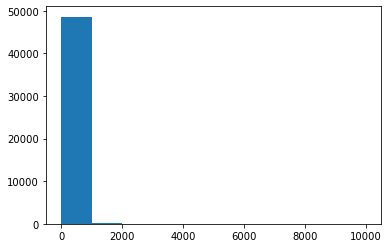

In [96]:
import matplotlib.pyplot as plt
plt.hist(df.price,label=og=True)

(array([21877., 17233.,  5867.,  1930.,   753.,   376.,   223.,   162.,
          101.,   373.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

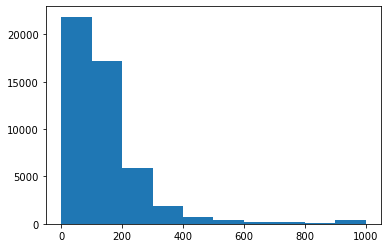

In [98]:
df2 = df.copy()
df2.loc[df2.price > 1000,'price'] = 1000
plt.hist(df2.price)

In [99]:
import numpy as np


In [104]:
np.isnan(np.NaN)

True